In [1]:
import keras
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tqdm import tqdm
%matplotlib inline

Using TensorFlow backend.


In [2]:
train = pd.read_csv('datadata.csv')    # reading the csv file
train.head()      # printing first five rows of the file

,Image,Emotion
0,01920_horror_detect.jpg,Fear
1,11920_horror_detect.jpg,Fear
2,21920_horror_detect.jpg,Fear
3,31920_horror_detect.jpg,Fear
4,41920_horror_detect.jpg,Fear


In [3]:
train.columns

Index(['Image', 'Emotion'], dtype='object')

In [4]:
train_image = []
for i in tqdm(range(train.shape[0])):
    img = image.load_img('/Users/peyamowar/Peya_emotion_detection/datadata/'+str(train['Image'][i]),target_size=(224,224,3))
    img = image.img_to_array(img)
    img = img/255
    train_image.append(img)
X = np.array(train_image)

100%|██████████| 1220/1220 [00:10<00:00, 121.35it/s]


In [5]:
X.shape

(1220, 224, 224, 3)

In [6]:
from keras.utils import to_categorical
y = train.drop(['Image'],axis=1)
y.shape
le=LabelEncoder()
ds=y.apply(le.fit_transform)
y=np.array(ds)
print(np.unique(y))
print(le.inverse_transform([0,1,2,3,4,5]))
y=to_categorical(y)
print(y.shape)

[0 1 2 3 4 5 6 7 8]
['Anger' 'Disgust' 'Fear' 'Happy' 'Joy' 'Love']
(1220, 9)


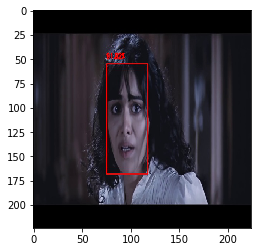

In [7]:
plt.imshow(X[2])

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.1)

In [13]:
#VGG16
from keras.applications.vgg16 import VGG16
model = Sequential()
model.add(VGG16(include_top='False', input_shape=(224,224,3)))
#model.add(Flatten())
model.add(Dense(256, activation='softmax'))
model.add(Dropout(0.25))
model.add(Dense(9, activation='softmax'))
#model.add(Dense(7, activation='softmax'))

In [14]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 1000)              138357544 
_________________________________________________________________
dense_3 (Dense)              (None, 256)               256256    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 9)                 2313      
Total params: 138,616,113
Trainable params: 138,616,113
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=64)
#model.fit(X_train, y_train, epochs=10, batch_size=16)

Train on 1098 samples, validate on 122 samples
Epoch 1/10
1098/1098 [==============================] - 1195s 1s/step - loss: 2.1792 - accuracy: 0.2778 - val_loss: 2.1636 - val_accuracy: 0.2295
Epoch 2/10
1098/1098 [==============================] - 1198s 1s/step - loss: 2.1463 - accuracy: 0.2760 - val_loss: 2.1336 - val_accuracy: 0.2295
Epoch 3/10
1098/1098 [==============================] - 1189s 1s/step - loss: 2.1149 - accuracy: 0.2842 - val_loss: 2.1046 - val_accuracy: 0.2295
Epoch 4/10
 256/1098 [=====>........................] - ETA: 15:20 - loss: 2.1050 - accuracy: 0.2734